In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define activation functions to test
activations = ['identity', 'logistic', 'tanh', 'relu']
models = {act: MLPClassifier(hidden_layer_sizes=(50,), activation=act, solver='sgd', max_iter=1, warm_start=True, random_state=42) for act in activations}


In [6]:
# Track performance
history = {act: {'accuracy': [], 'time': []} for act in activations}
n_epochs = 100

# Training loop
for epoch in range(n_epochs):
    for act, model in models.items():
        start_time = time.perf_counter()
        model.partial_fit(X_train, y_train, classes=np.unique(y))
        end_time = time.perf_counter()

        # Record accuracy and time
        accuracy = accuracy_score(y_train, model.predict(X_train))
        history[act]['accuracy'].append(accuracy)
        history[act]['time'].append(end_time - start_time)

# Final test accuracy
final_test_accuracy = {act: accuracy_score(y_test, model.predict(X_test)) for act, model in models.items()}


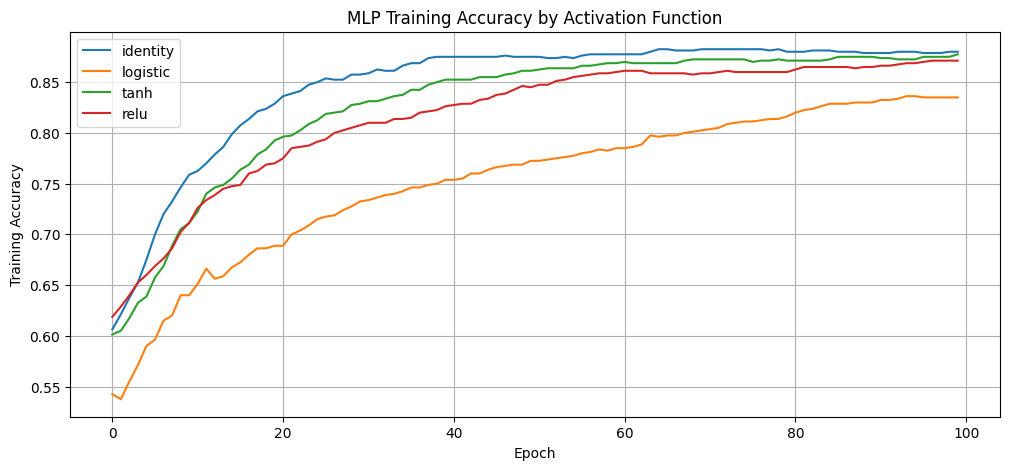

In [7]:
# Plot accuracy trends
plt.figure(figsize=(12, 5))
for act in activations:
    plt.plot(history[act]['accuracy'], label=act)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('MLP Training Accuracy by Activation Function')
plt.legend()
plt.grid(True)
plt.show()

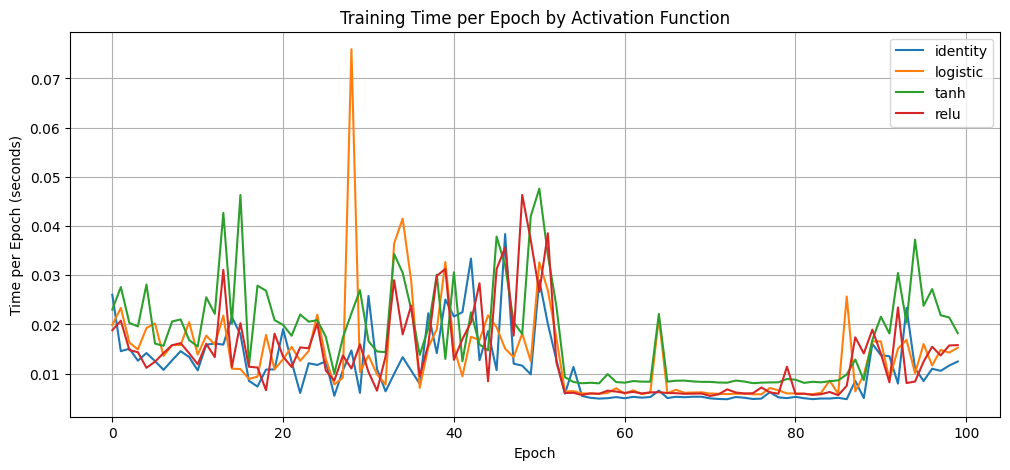

In [8]:
# Plot training time trends
plt.figure(figsize=(12, 5))
for act in activations:
    plt.plot(history[act]['time'], label=act)
plt.xlabel('Epoch')
plt.ylabel('Time per Epoch (seconds)')
plt.title('Training Time per Epoch by Activation Function')
plt.legend()
plt.grid(True)
plt.show()

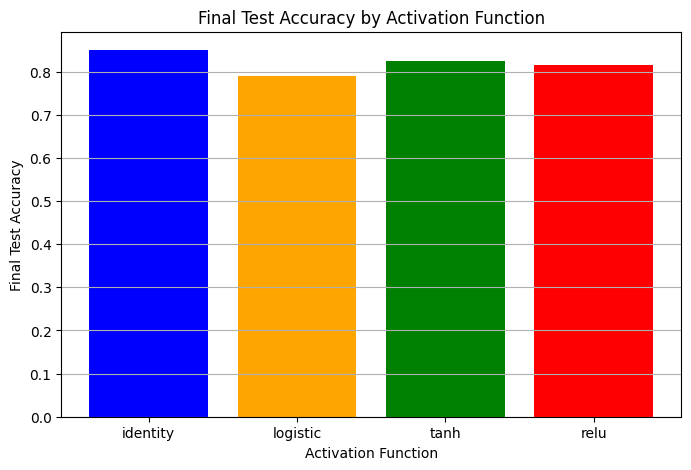

In [9]:
# Plot final test accuracy
plt.figure(figsize=(8, 5))
plt.bar(final_test_accuracy.keys(), final_test_accuracy.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Activation Function')
plt.ylabel('Final Test Accuracy')
plt.title('Final Test Accuracy by Activation Function')
plt.grid(axis='y')
plt.show()
